<a href="https://colab.research.google.com/github/ManasviAtGitHub/pytorch_deep_learning/blob/main/PyTorch_02_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Workflow for Machine learning

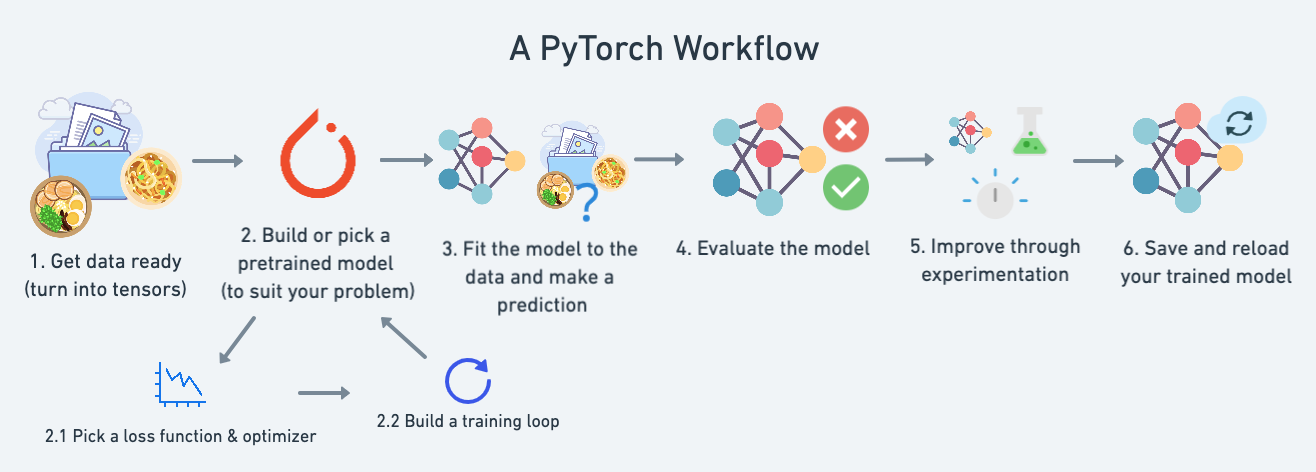

* Data (prepare and load).
* Build Model.
* Fitting the model to data(training).
* Making the predictions and evaluating a model (inference).
* Saving and loading a model.
* Putting it all together.

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

### 1. Data (prepare and load).

1.   List item
2.   List item


* Excel spreadsheet
* Images
* Videos
* Audios
* DNA
* Text

In [2]:
# Create known* parameters

weight = 0.7
bias = 0.3


# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

**Spliting data into training and test sets**

In [3]:
# create a train/test split (80/20 rule)
train_split = int(0.8 * len(X))
train_split

40

In [4]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

**Visualize our data**

In [6]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):

  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', s=4, label = "Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c = 'g', s=4, label = "Testing Data")

  # Predictions if available
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  #show the legend
  plt.legend(prop={"size" : 14})

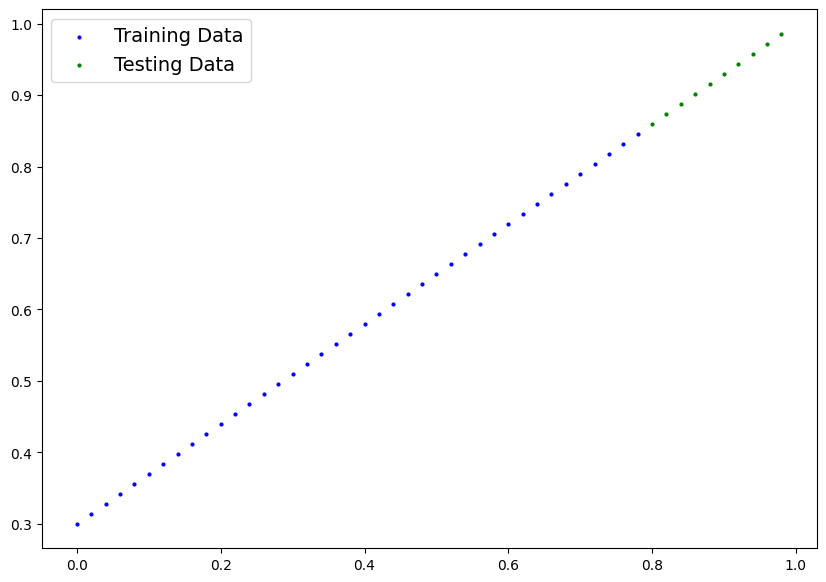

In [7]:
plot_predictions()

### 2. Build Model.

In [8]:
from torch import nn
## create linear regression model class
class LinearRegressionModel (nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input
    return self.weights * x + self.bias # this is the linear regression formula






**Torch model essentials**

* torch.nn : Contains all of the building blocks for computational graphs.
* torch.nn.Module : The base class for all neural network modules, all the building blocks for neural network are subclasses. Requires forward() method to be implemented.
* torch.optim : Contains various optimization algorithms, these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss.
* torch.utils.data.Dataset : Represents a map between key (label) and sample(features) pairs of your data.
* torch.utils.data.DataLoader : Create a python iterable over a torch Dataset (allows you to iterate over your datat).

In [27]:
## checking the contents of model

# create a random seed
torch.manual_seed(42)

# create an instance of the model
model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [28]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [29]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

**Making prediction using torch.inference_mode()**

To check our model's predictice power, let's see how well it predicts y_test based on X_test

When we pass data througn our model, it's going to run it through the forward() method


In [30]:
# make predictiosn with model

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

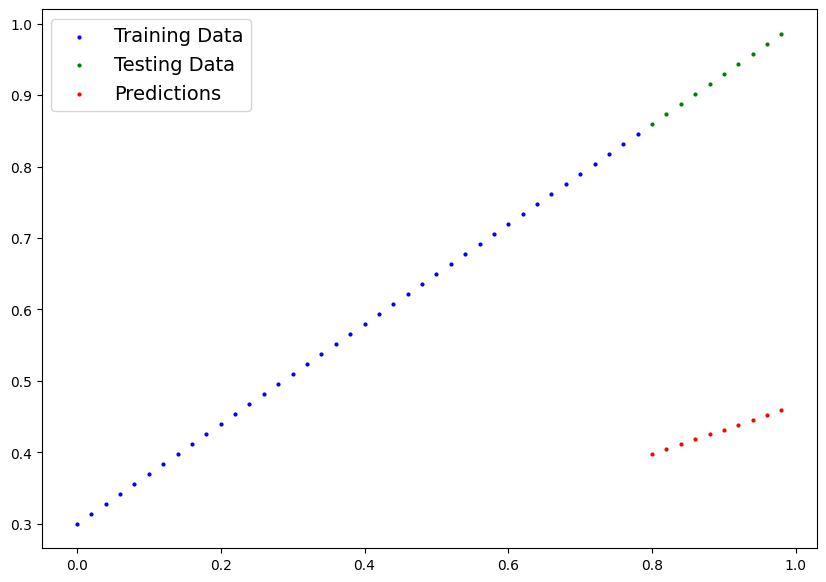

In [31]:
plot_predictions(predictions=y_preds)

### 3. Train Model.

The whole idea of training is for a model to move from some *unknown* parameters to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* **Loss function:** A function to measure how wrong your model's predictions are to ideal output

* **Optimize:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)
    * params - the model parameters you'd like to optimize, for example params = model_0.parameters()
    * lr(learning_rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in large changes)

In [32]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)

Building a training loop (and a testing loop) in PyTorch

* Loop through the data
* Forward pass
* Calculate the loss
* Optimizer zero grad
* Loss backward
* Optimizer step


In [33]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [34]:
torch.manual_seed(42)

# an epoch is one loop through the data... (this is hyperparameter)
epochs = 200

# list to track values
train_loss_values = []
test_loss_values = []
epoch_count = []


# loop through the data
for epoch in range(epochs):


  model_0.train()

  # forward pass
  y_pred = model_0(X_train)
  # calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss : {loss}")


  # optimze zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward(retain_graph=True)

  # optimze step
  optimizer.step() # changes will accumulates thorugh the loop

  # testing
  model_0.eval() #turns off different settings in the model not needed for evaluation

  with torch.inference_mode(): #turns off gradient tracking

    # forward pass
    test_pred = model_0(X_test)

    # calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")


  # print(model_0.state_dict())

Loss : 0.31288138031959534
Epoch : 0 | Loss : 0.31288138031959534 | Test loss : 0.48106518387794495
Loss : 0.3013603389263153
Loss : 0.28983935713768005
Loss : 0.2783183455467224
Loss : 0.26679736375808716
Loss : 0.2552763521671295
Loss : 0.24375534057617188
Loss : 0.23223432898521423
Loss : 0.22071333229541779
Loss : 0.20919232070446014
Loss : 0.1976713240146637
Epoch : 10 | Loss : 0.1976713240146637 | Test loss : 0.3463551998138428
Loss : 0.18615034222602844
Loss : 0.1746293306350708
Loss : 0.16310831904411316
Loss : 0.1515873372554779
Loss : 0.14006635546684265
Loss : 0.1285453587770462
Loss : 0.11702437698841095
Loss : 0.1060912236571312
Loss : 0.09681284427642822
Loss : 0.08908725529909134
Epoch : 20 | Loss : 0.08908725529909134 | Test loss : 0.21729660034179688
Loss : 0.08227583020925522
Loss : 0.07638873159885406
Loss : 0.07160007208585739
Loss : 0.06747635453939438
Loss : 0.06395438313484192
Loss : 0.06097004935145378
Loss : 0.05845819041132927
Loss : 0.05635259300470352
Loss :

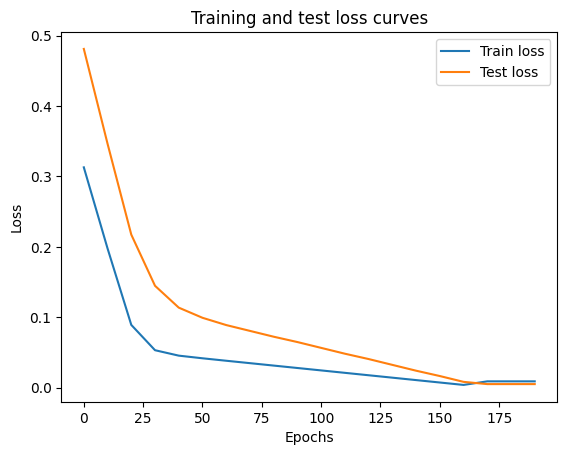

In [35]:
#plot the loss curve
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

### 4. Making the predictions and evaluating a model (inference).

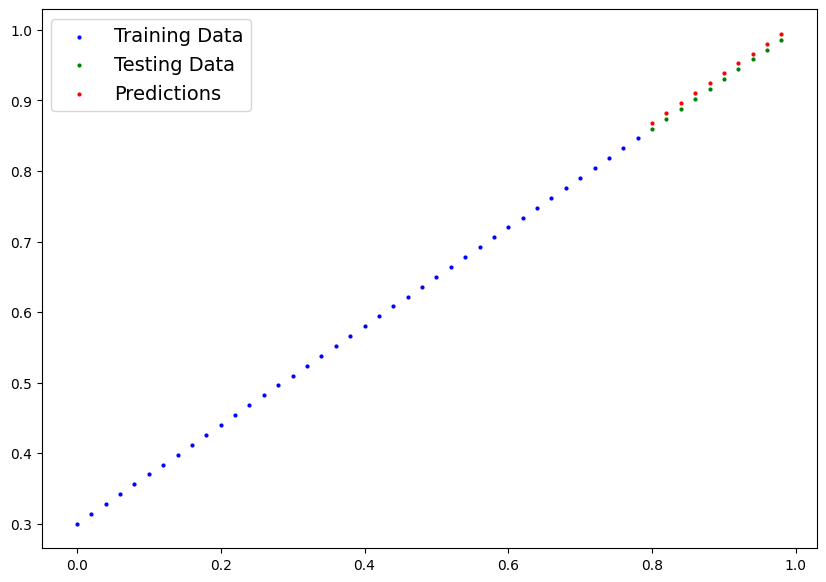

In [36]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

### 4. Saving and loading a model.

There are three main methods
* torch.save() - allows you to save a PyTorch object in Python's pickle format
* torch.load() - allows you to load a saved PyTorch object
* torch.nn.Module.load_state_dict() - this allows to load a model's saved state directory

In [37]:
# saving our pytorch model

from pathlib import Path

# create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = "workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to : models/workflow_model.pth


In [38]:
# Check the saved file path
!ls -l models/workflow_model.pth

-rw-r--r-- 1 root root 1091 Jul 16 13:07 models/workflow_model.pth


In [39]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [40]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # pe

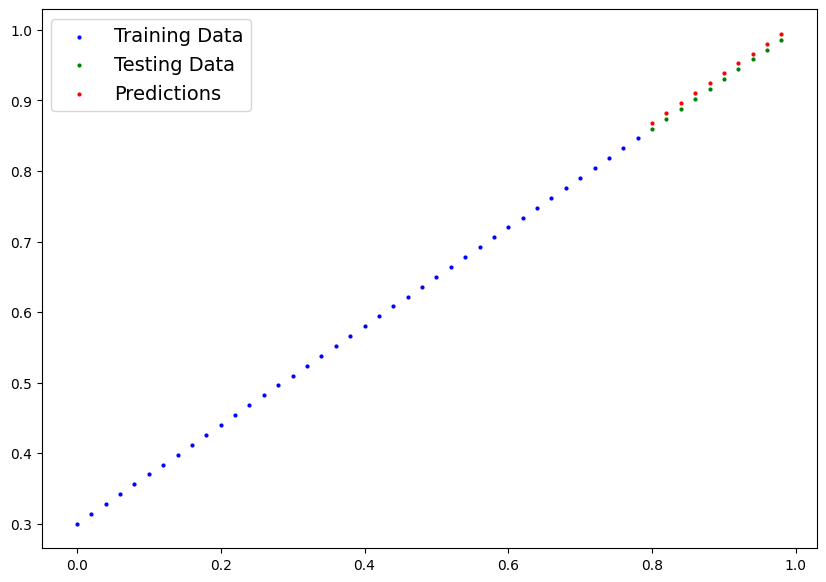

In [41]:
plot_predictions(predictions=loaded_model_preds)

### 5. Putting it all together

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [3]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [50]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [6]:
# check model device
next(model_1.parameters()).device

device(type='cpu')

In [7]:
# set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [8]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [9]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 200

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249


In [10]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [43]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):

  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', s=4, label = "Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c = 'g', s=4, label = "Testing Data")

  # Predictions if available
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  #show the legend
  plt.legend(prop={"size" : 14})

In [24]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

In [14]:
y_preds.cpu()

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

In [44]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU
test_preds = y_preds.cpu().numpy()
test_preds

array([[0.8599563 ],
       [0.87389255],
       [0.88782877],
       [0.9017649 ],
       [0.9157011 ],
       [0.9296373 ],
       [0.9435735 ],
       [0.95750964],
       [0.9714458 ],
       [0.985382  ]], dtype=float32)

In [37]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
X_train = X_train.cpu().numpy()
X_test = X_test.cpu().numpy()
y_train = y_train.cpu().numpy()
y_test = y_test.cpu().numpy()

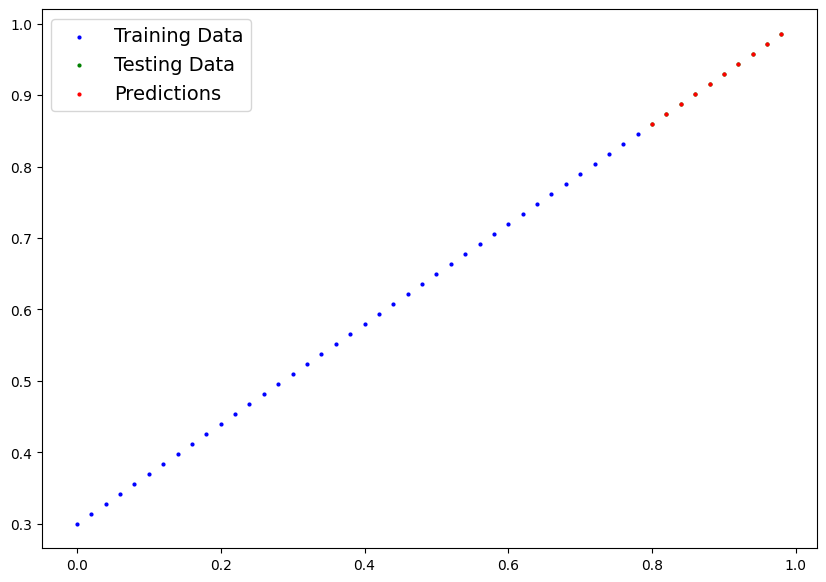

In [45]:
plot_predictions(predictions=test_preds)

In [46]:

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/workflow_model_1.pth


In [47]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [52]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [53]:
X_test.to(device)

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]], device='cuda:0')

In [54]:
X_test = X_test.to(device)

# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')